# COVID 19 Data Analysis and Predictions

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\Imarticus\machine learning\linear_regression\WHO COVID-19 cases.csv')

#### Initial data exploration

In [10]:
data.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      58560 non-null  object 
 1   Country_code       58316 non-null  object 
 2   Country            58560 non-null  object 
 3   Continent          58560 non-null  object 
 4   WHO_region         54168 non-null  object 
 5   New_cases          39260 non-null  float64
 6   Cumulative_cases   58560 non-null  int64  
 7   New_deaths         25084 non-null  float64
 8   Cumulative_deaths  58560 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 4.0+ MB


#### Data cleaning and preparation

In [16]:
data['Date_reported'] = pd.to_datetime(data['Date_reported'])

In [20]:
# data.info()

In [22]:
data.isnull().sum()

Date_reported            0
Country_code           244
Country                  0
Continent                0
WHO_region            4392
New_cases            19300
Cumulative_cases         0
New_deaths           33476
Cumulative_deaths        0
dtype: int64

### EDA

In [25]:
data.describe()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,58560,3.926000e+04,5.856000e+04,25084.000000,5.856000e+04
mean,2022-05-04 11:59:59.999999744,1.976918e+04,1.810312e+06,281.507335,2.012550e+04
min,2020-01-05 00:00:00,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,2021-03-05 06:00:00,4.200000e+01,4.402750e+03,4.000000,2.900000e+01
50%,2022-05-04 12:00:00,3.900000e+02,4.682750e+04,20.000000,5.845000e+02
75%,2023-07-03 18:00:00,3.925000e+03,5.351678e+05,104.000000,7.118000e+03
max,2024-09-01 00:00:00,4.047548e+07,1.034368e+08,47687.000000,1.197213e+06
std,NaN,2.699850e+05,7.851277e+06,1212.511007,8.220948e+04


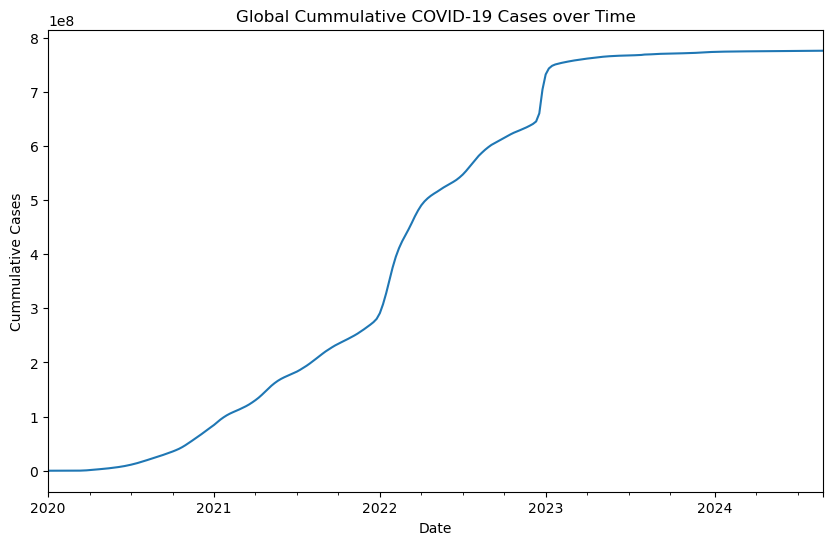

In [39]:
# plotting the cummulative cases over time
plt.figure(figsize=(10,6))
data.groupby('Date_reported')['Cumulative_cases'].sum().plot()
plt.title('Global Cummulative COVID-19 Cases over Time')
plt.xlabel('Date')
plt.ylabel('Cummulative Cases')
plt.show()

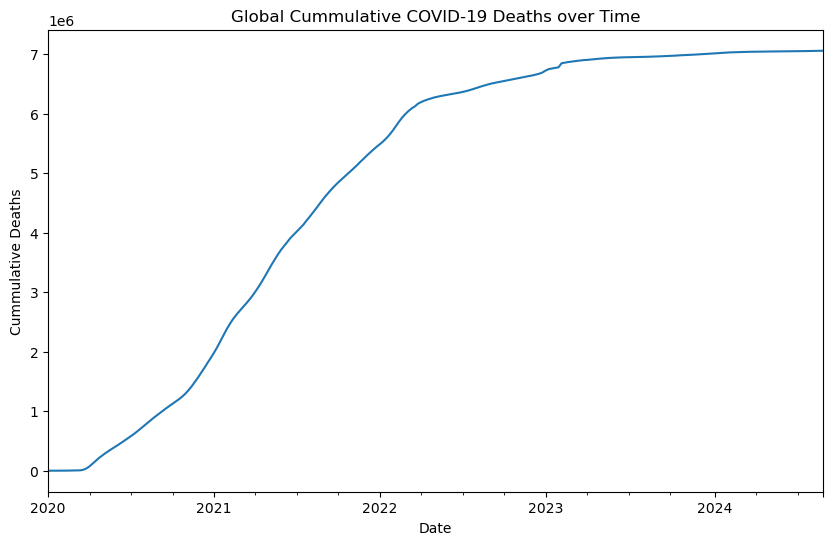

In [37]:
# plotting the cummulative deaths over time
plt.figure(figsize=(10,6))
data.groupby('Date_reported')['Cumulative_deaths'].sum().plot()
plt.title('Global Cummulative COVID-19 Deaths over Time')
plt.xlabel('Date')
plt.ylabel('Cummulative Deaths')
plt.show()

### Correlation matrix

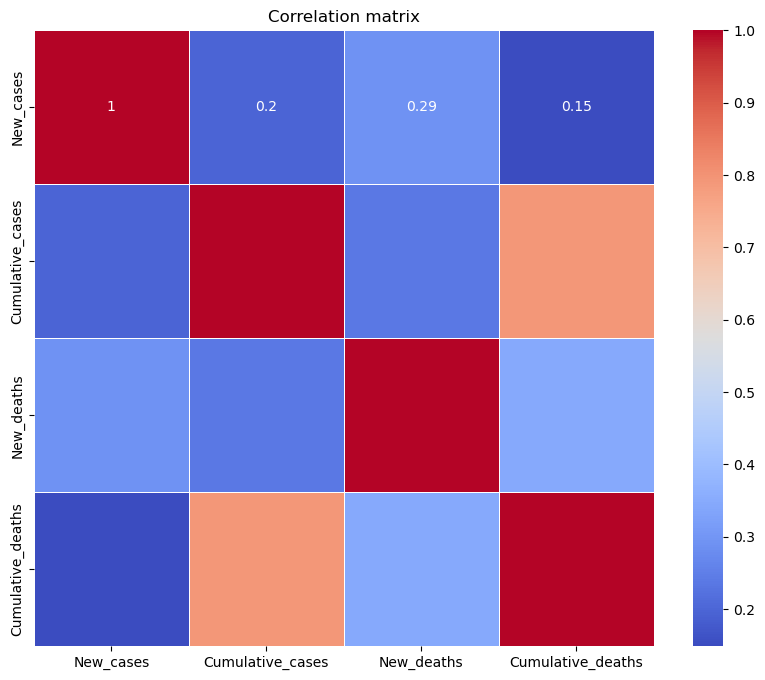

In [42]:
# select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# compute the correlation matrix
corr_matrix = numeric_data.corr()

# plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

## Predictive Modeling

In [47]:
# prepare the data for modeling
X = data[['Cumulative_cases', 'Cumulative_deaths']]
y = data['New_cases'].fillna(0)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mse,r2

(8374025934.661684, 0.05017072970261249)

### Conclusion and Future Work